# Implied Future & Discount From Option Quotes

This notebook computes the implied underlying future bid/ask from option quotes of a *single expiry*.

* Computes an **implied future quote** $[F_{\text{bid}}, F_{\text{ask}}]$ and a **discount range** $[D_{\min}, D_{\max}]$ that are **jointly consistent** with the quoted calls & puts.
* Identifies and **excludes the fewest possible strikes** whose quotes prevent any consistent solution (likely stale/misquoted lines).
* Visualizes per-strike **implied future intervals** and the final $[F_{\text{bid}}, F_{\text{ask}}]$.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120

from volkit import estimate_future_from_option_quotes
from volkit.datasets import spxw

Read a set op example option quotes. Weekly S&P options with 7 days to expiry. Use only quotes that have been trades at least once (min_vol=1)

In [2]:
df = spxw(min_volume=1, D=7)

F,2918.900000
F_bid,2918.600000
F_ask,2919.200000
D,0.999083
D_min,0.99066667
D_max,1.00750000


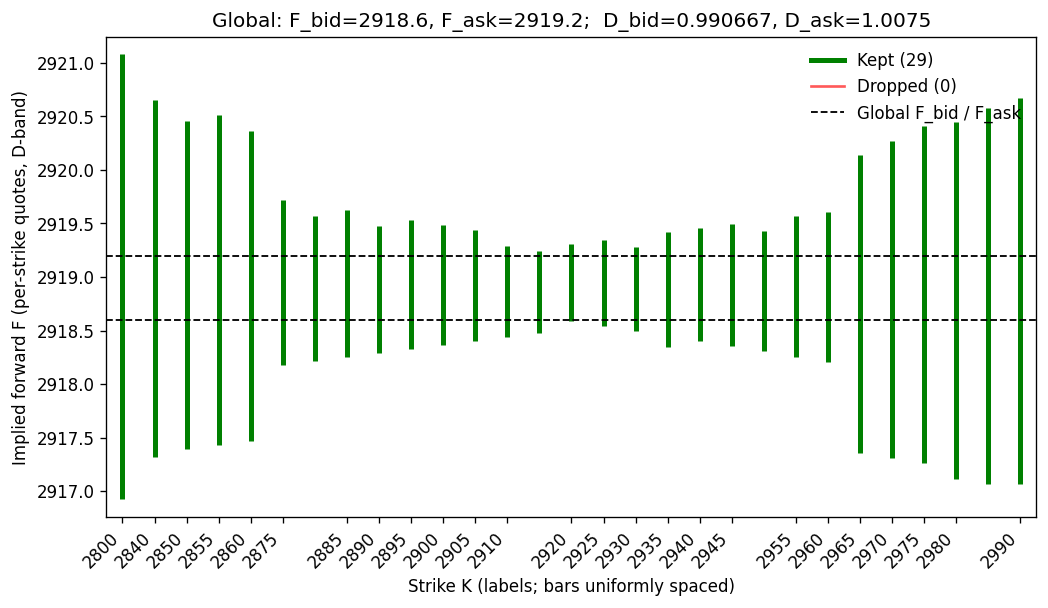

In [ ]:
res, valid_mask = estimate_future_from_option_quotes(
   df['K'], 
   df['C_bid'], 
   df['C_ask'], 
   df['P_bid'], 
   df['P_ask'],
   plot=True
)

res

## The plot

We plot, for each strike $K_i$, a **vertical bar** from $F_{\text{bid},i}$ to $F_{\text{ask},i}$ (computed at a representative discount $D^* = (D_{\min}+D_{\max})/2$:

- **Green bars**: strikes that were **kept** (they all overlap with the final band).  
- **Red bars**: strikes that were **excluded** (their intervals don’t overlap the consensus). These are typically **stale** quotes (e.g., recorded when the underlying was briefly elsewhere) or fat-fingered lines, and they **create arbitrage** when combined with the rest of the book.

Two dashed black horizontal lines mark the final $\big[F_{\text{bid}}, F_{\text{ask}}\big]$.  
By construction, **all green bars intersect this band**.
